In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams




path = '/content/sample_data/imdb-reviews-pt-br.csv'

In [ ]:
nltk.download("all")

# Entender dado

In [7]:
resenha = pd.read_csv(path)

In [8]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [9]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

# Treino

In [10]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state=42)

In [11]:

#reg_log = LogisticRegression()
#reg_log.fit(treino, classe_treino)
#acuracia = reg_log.score(teste, classe_teste)

Precisamos realizar a tradução humano-máquina

In [12]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [13]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [14]:
resenha["classificacao"] = classificacao

In [15]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

# Bag of Words
* Consiste em criar um vocabulário com todas as palavras do texto e atribuir valores binários para cada palavra com base em sua presença ou ausência nas frases.
* É importante selecionar dados de treinamento representativos e abrangentes para criar uma representação genérica o suficiente.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

In [18]:
vetorizar = CountVectorizer()

# Cria a BoW
bow = vetorizar.fit_transform(texto)

In [19]:
bow

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [20]:
vetorizar

CountVectorizer()

In [21]:
vetorizar.get_feature_names_out()

array(['assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [22]:
#matrix = pd.DataFrame(bow, columns=vetorizar.get_feature_names())
sparse_matrix =  pd.DataFrame.sparse.from_spmatrix(bow, columns=vetorizar.get_feature_names_out())

In [23]:
sparse_matrix
# Frase 0, frase 1... tem ou não tem

assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

## Caso real

In [24]:
vetorizar = CountVectorizer(max_features=50)
bow = vetorizar.fit_transform(resenha.text_pt)
print(bow.shape)

(49459, 50)


### Treino e teste

In [25]:
treino, teste, classe_treino, classe_teste = train_test_split(bow,
                                                              resenha.classificacao,
                                                              random_state=42)

In [26]:
reg_log = LogisticRegression(solver='lbfgs')
reg_log.fit(treino, classe_treino)
acuracia = reg_log.score(teste, classe_teste)
print(acuracia)

0.6689041649818035


Função que classifica texto

In [27]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(max_features=50)
  bow = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bow,
                                                              texto[coluna_classificacao],
                                                              random_state=42)

  reg_log = LogisticRegression(solver='lbfgs')
  reg_log.fit(treino, classe_treino)
  return reg_log.score(teste, classe_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6689041649818035


# Representação visual para insight - WordCloud
* Quais palavras mais repetem

In [28]:
pip install WordCloud

In [29]:
%matplotlib inline

Entrada da wordcloud é uma Lista de todas as palavras

In [30]:
todas_frases = [texto for texto in resenha.text_pt]

In [31]:
len(todas_frases)

49459

In [32]:
todas_palavras = " ".join(todas_frases)

In [33]:
len(todas_palavras) #numero de caracteres

63448424

In [34]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

In [35]:
nuvem_palavras

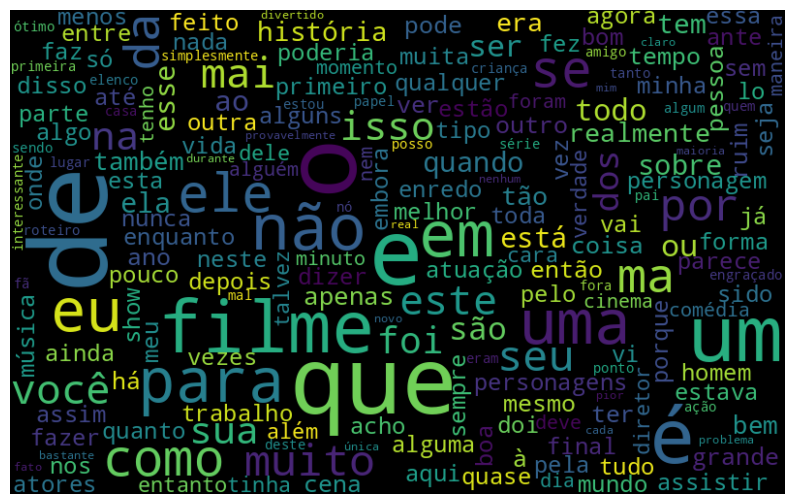

In [36]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

As palavras que mais repetem não fazem sentido semântico

Agora vamos dividir as palavras que mais repetem na negativa e positiva

In [37]:
resenha.query("sentiment == 'pos'")

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

In [38]:
def gera_imagem(todas_palavras):
  nuvem_palavras = WordCloud(width= 800, height= 500,
                            max_font_size = 110,
                            collocations = False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [39]:
def nuvem_palavras_neg(texto, coluna_texto):
  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  gera_imagem(todas_palavras)

In [40]:
def nuvem_palavras_pos(texto, coluna_texto):
  texto_positivo = texto.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  gera_imagem(todas_palavras)

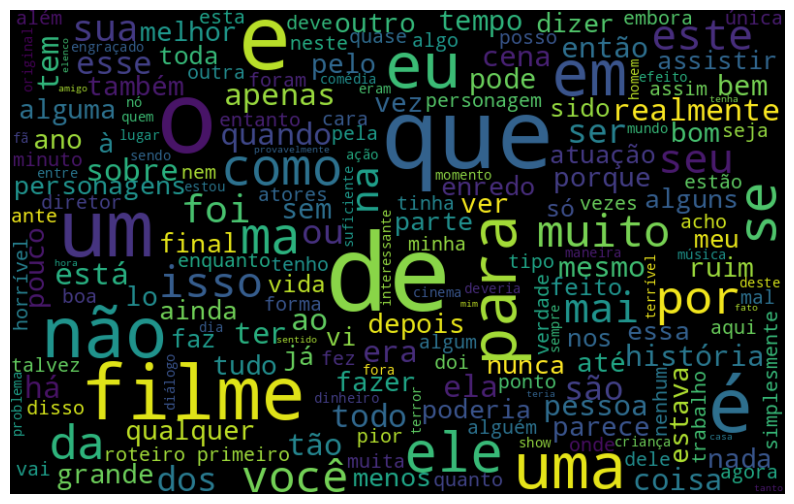

In [41]:
nuvem_palavras_neg(resenha, "text_pt")

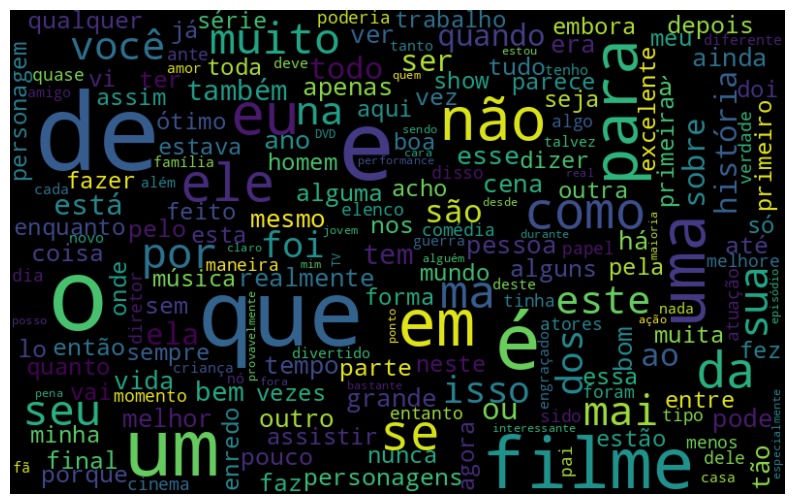

In [42]:
nuvem_palavras_pos(resenha, "text_pt")

# NLTK, a biblioteca

Separar cada palavra de uma frase de chama **tokenização**

In [43]:
from nltk import tokenize

In [44]:
frases = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frases)
frequencia
# Aqui pega a frequência das frases, mas queremos das palavras

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [45]:
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


## Aplica no dataset

In [46]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [47]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [48]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [49]:
df_frequencia.nlargest(columns = "Frequência", n=10)

Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

## Visualizar

In [50]:
def f_df_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)

    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequencia": list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns = "Frequencia", n = quantidade)

    return df_frequencia

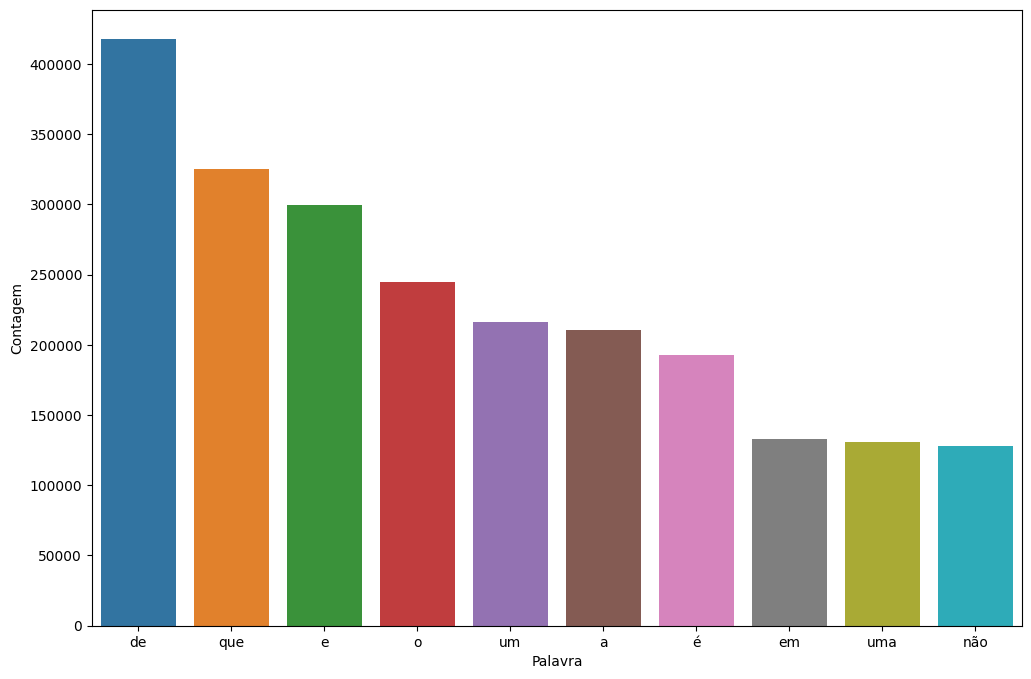

In [51]:
def pareto(texto, coluna_texto, quantidade):
    df_frequencia = f_df_frequencia(texto, coluna_texto, quantidade)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia")
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

# Tratamento

Stop Words = palavras irrelevantes

In [52]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [53]:
frase_processada = list()

for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [54]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6646987464617873

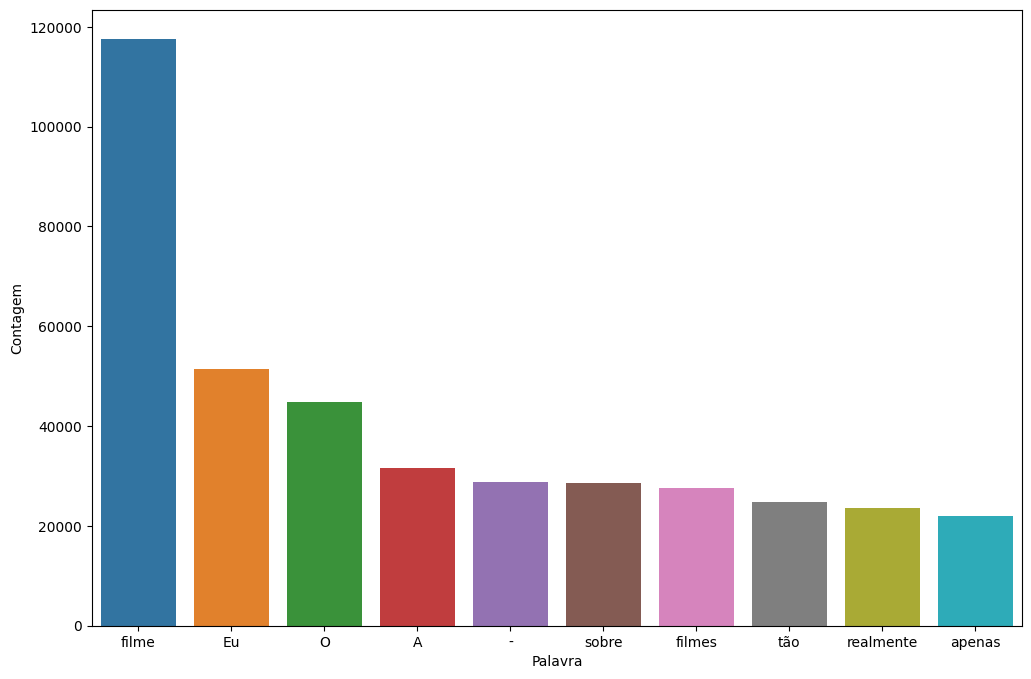

In [55]:
pareto(resenha, "tratamento_1", 10)

# Otimização

Retirar pontuação

In [56]:
frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


Caso real

In [57]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [58]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [59]:
frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [60]:
resenha ["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [61]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

Retirar acentuação

In [64]:
 pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.1 MB/s eta 0:00:00


In [65]:
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [66]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

Ao retirar os acentos, evitamos que palavras com acentuação diferente sejam tratadas como palavras distintas, melhorando a precisão da análise

In [67]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

## Resultados

In [68]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [69]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6592802264456126


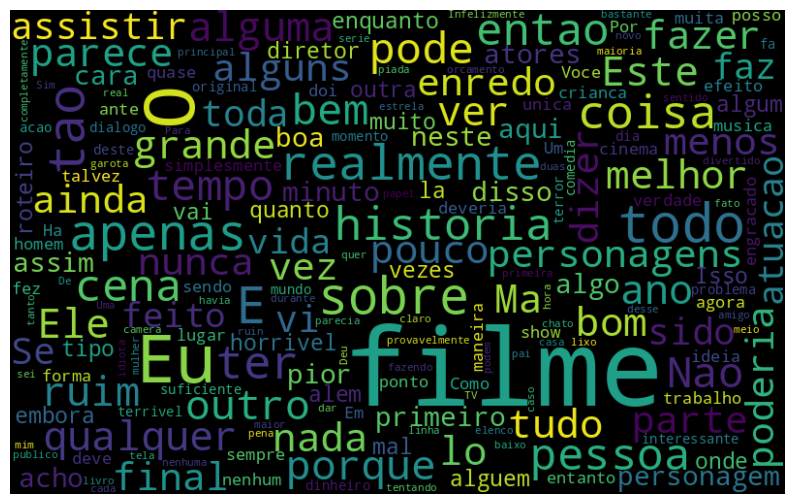

In [70]:
nuvem_palavras_neg(resenha, "tratamento_3")

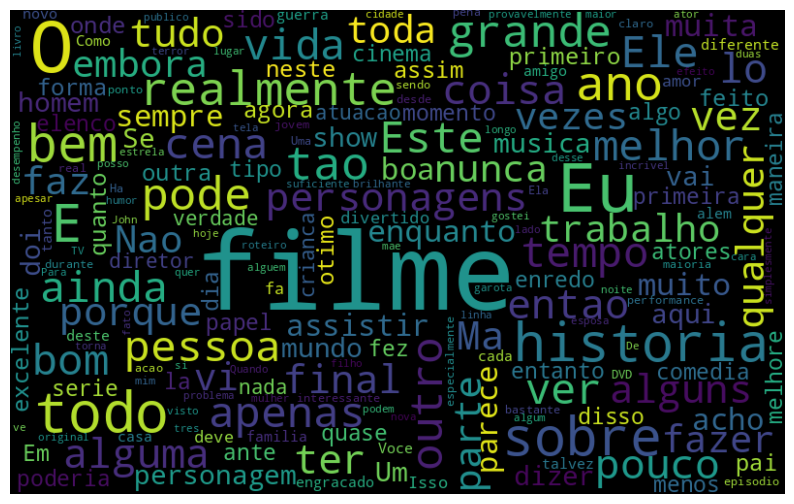

In [71]:
nuvem_palavras_pos(resenha, "tratamento_3")

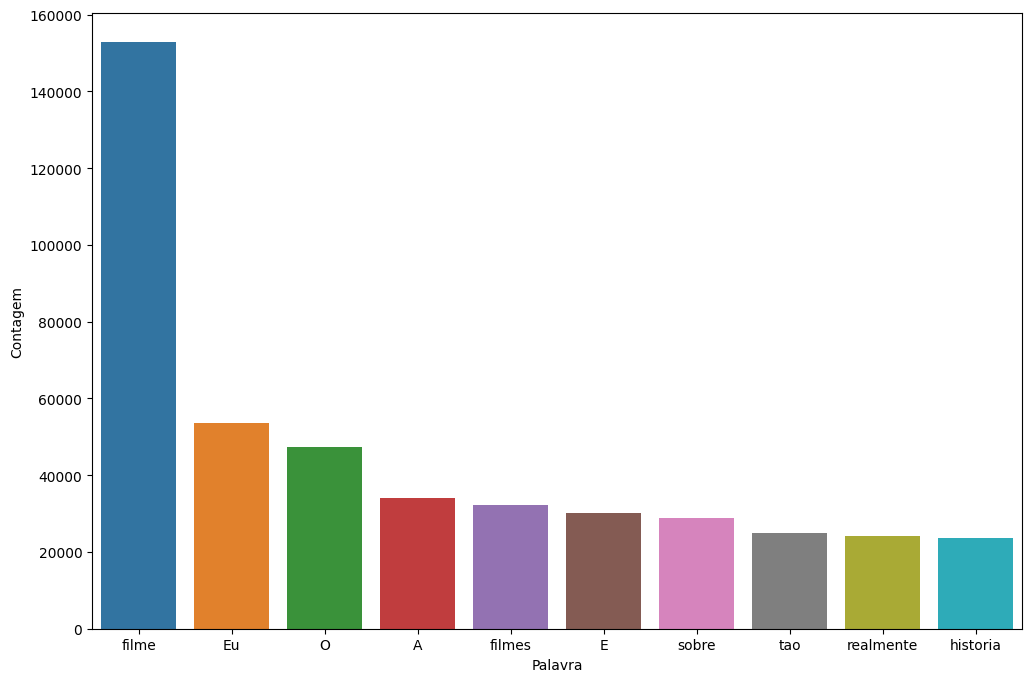

In [72]:
pareto(resenha, "tratamento_3", 10)

## Mais otimizações

 tratamento de transformação de todos os dados em letras minúsculas. Além disso, foram removidas as stopwords, como as palavras "eu", "o" e "a".

In [73]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    # minusc
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [75]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6874241811564901
0.6592802264456126


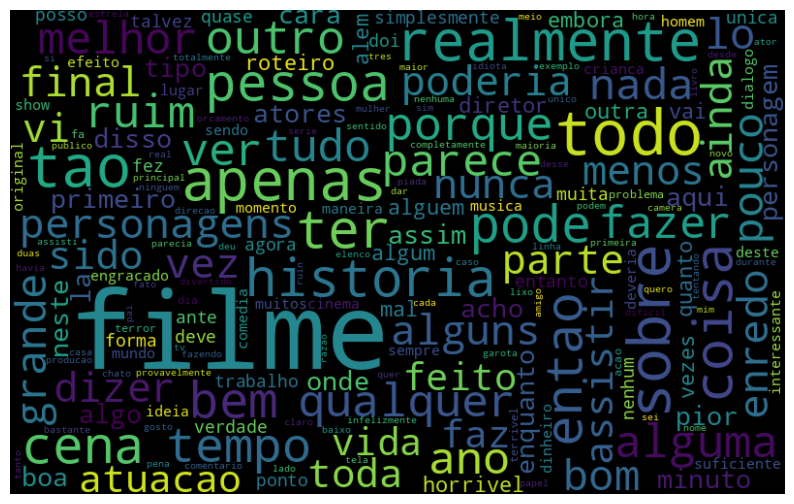

In [76]:
nuvem_palavras_neg(resenha, "tratamento_4")

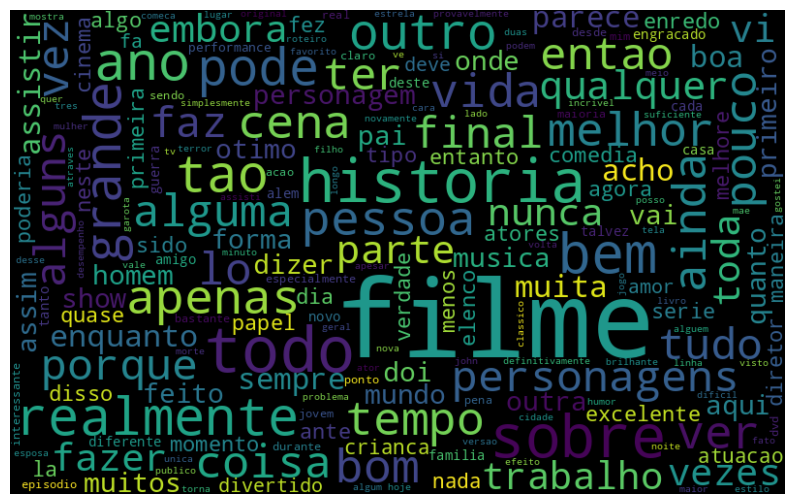

In [77]:
nuvem_palavras_pos(resenha, "tratamento_4")

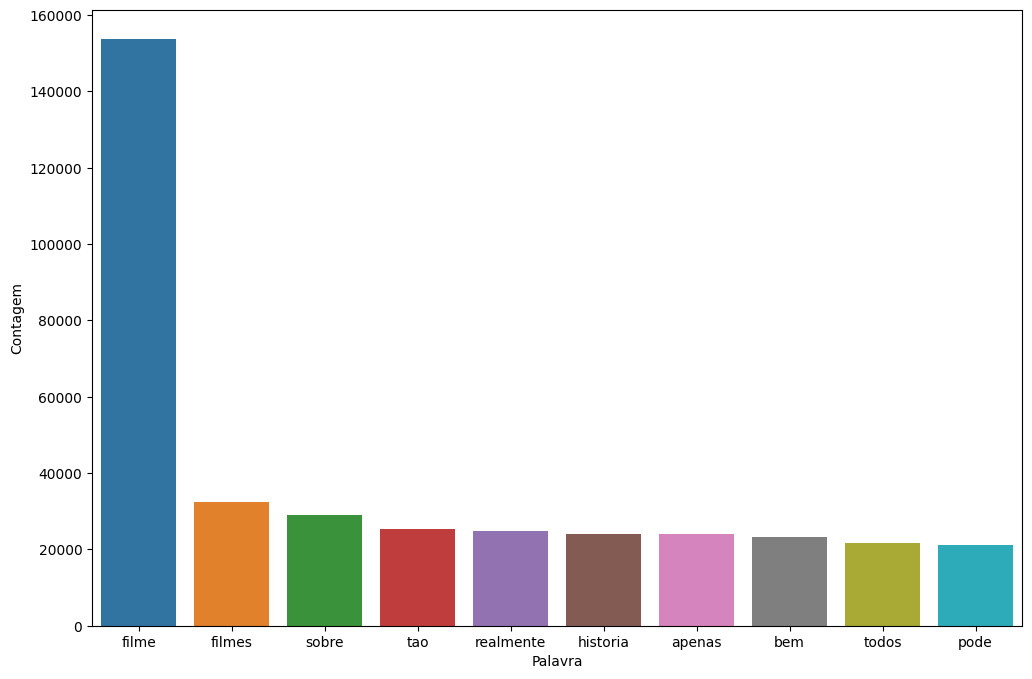

In [78]:
pareto(resenha, "tratamento_4", 10)

# Evitar derivações e flexões

Stemmer
* reduzir as palavras a um radical comum.

In [79]:
# Remove sufixo
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

Caso real

In [80]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

resenha["tratamento_4"] = frase_processada

In [81]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6954306510311363
0.6874241811564901


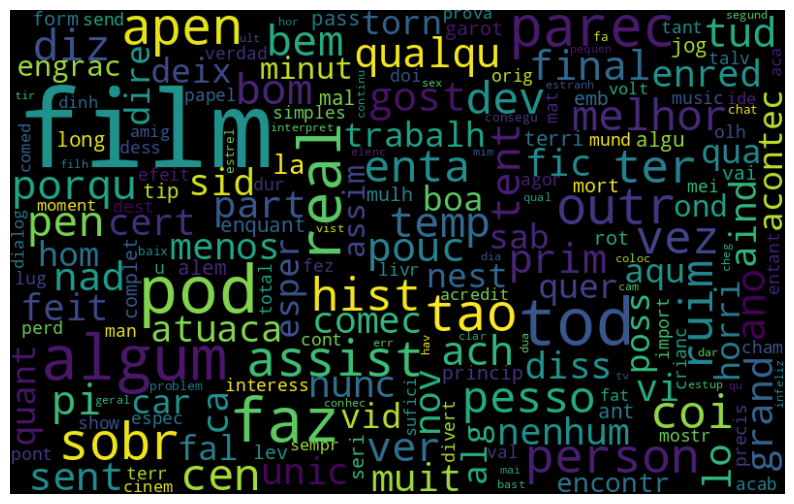

In [82]:
nuvem_palavras_neg(resenha, "tratamento_5")

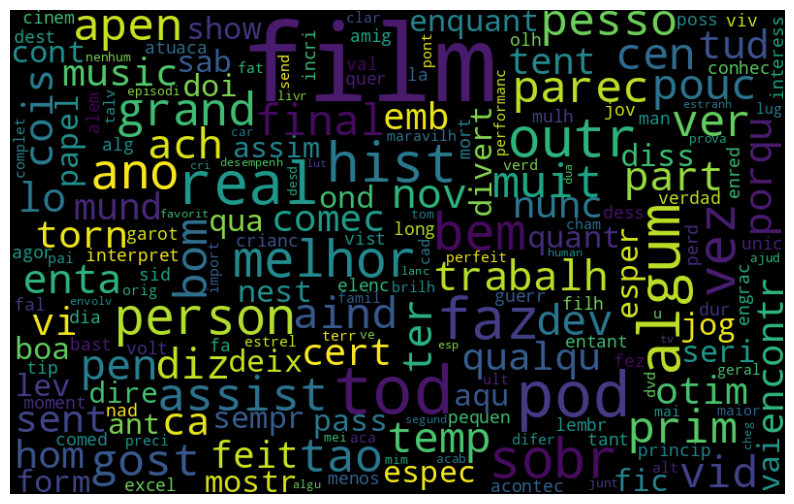

In [83]:
nuvem_palavras_pos(resenha, "tratamento_5")

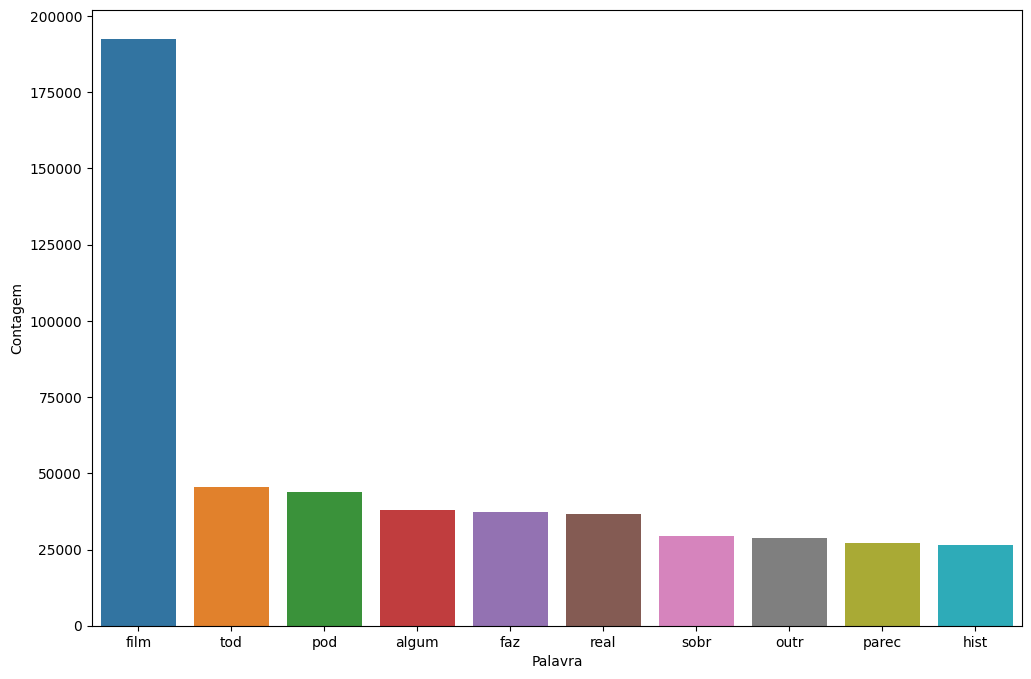

In [84]:
pareto(resenha, "tratamento_5", 10)

# TF-IDF
* Nova forma de vetorizar
* Term Frequency-Inverse Document Frequency) é uma técnica utilizada para atribuir pesos às palavras em um conjunto de dados.
* palavras que aparecem com mais frequência em um documento específico e menos frequência nos demais documentos recebem um peso maior.
* Isso ajuda a identificar as palavras mais importantes em um conjunto de dados.

In [91]:

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

# retorna uma matriz esparsa que representa as características das frases.
caracteristicas = tfidf.fit_transform(frases)

# Utilizamos o método todense() para converter a matriz esparsa em uma matriz densa.
# Utilizamos o método get_feature_names_out() para obter o nome das palavras.
pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [92]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha["classificacao"], random_state = 42)

reg_log.fit(treino, classe_treino)
acuracia_tfidf_bruto = reg_log.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [93]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha["classificacao"], random_state = 42)

reg_log.fit(treino, classe_treino)
acuracia_tfidf_tratados = reg_log.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6963202587949858


# Ngrams
* Preservar a sequência de palavras em um texto.
* Isso ajuda a reforçar palavras importantes e manter uma estrutura sequencial.

In [96]:
frase = "Assisti um ótimo filme."

frase_separada = token_espaco.tokenize(frase)

# 2o param -> Quantas palavras analisar em seq
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

com ngrams

In [97]:
# ngram_range -> palavras isoladas e em sequência (1,2)
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))

vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 42)

reg_log.fit(treino, classe_treino)

acuracia_tfidf_ngrams = reg_log.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8856449656287909


Sem ngrans aqui

In [98]:
tfidf = TfidfVectorizer(lowercase=False)

vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 42)

reg_log.fit(treino, classe_treino)

acuracia_tfidf = reg_log.score(teste, classe_teste)
print(acuracia_tfidf)

0.8847553578649414


In [103]:
pesos = pd.DataFrame(
    reg_log.coef_[0].T,
    index = tfidf.get_feature_names_out()
)
pesos.nlargest(10, 0)

0
otim      8.308451
excel     7.993105
perfeit   6.548647
favorit   5.781222
maravilh  5.291919
incri     5.052568
hilari    4.654489
divert    4.552203
ador      4.410095
brilh     4.268983

In [104]:
pesos.nsmallest(10, 0)

0
pi      -9.184374
ruim    -9.178711
horri   -8.761561
terri   -7.195839
chat    -6.921857
nad     -6.032458
infeliz -5.298478
decepca -4.985072
ridicul -4.971446
parec   -4.938893